In [1]:
import cv2
import numpy as np
#The Plan
'''
Sharpen square edges. Load the image, conve|rt to grayscale, median blur to smooth, and sharpen to enhance edges.

Obtain binary image and remove noise. We threshold to obtain a black/white binary image. 
Depending on the image, Otsu's thresholding or adaptive thresholding would work. 
From here we create a rectangular kernel and perform morphological transformations to remove noise and enhance the square contours.

Detect and extract squares. Next we find contours and filter using minimum/maximum threshold area. 
Any contours that pass our filter will be our squares so to extract each ROI, we obtain the bounding rectangle coordinates, 
crop using Numpy slicing, and save each square image.
'''

Scalewidth = 63
Scalehight = 88

In [2]:
#for debugging not needed in end
from matplotlib import pyplot as plt
imgpath = 'tests/controled4.jpg'

In [3]:
# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

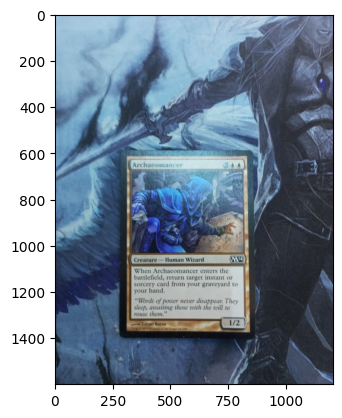

In [4]:
img = cv2.imread('tests/controled1.jpg')
plt.imshow(img)
plt.show()

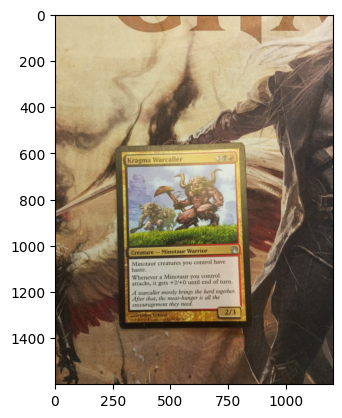

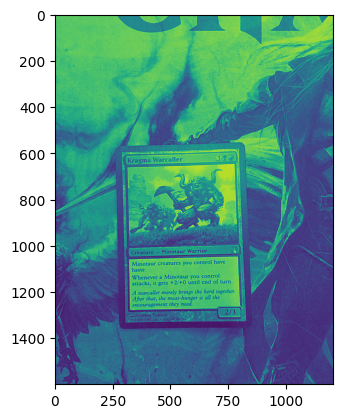

In [5]:
# Load image, grayscale, median blur, sharpen image
image = cv2.imread(imgpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)
plt.imshow(image)
plt.show()
plt.imshow(sharpen)
plt.show()

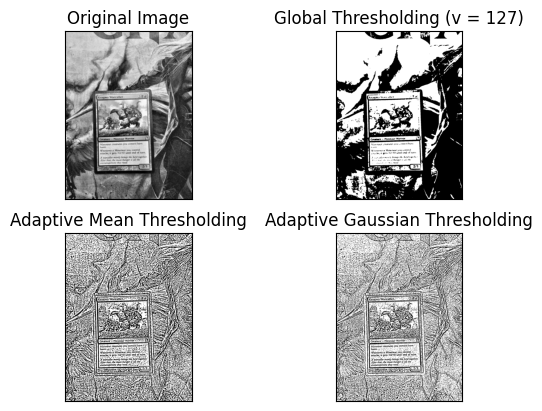

In [6]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl1 = clahe.apply(img)

img = cv2.medianBlur(cl1,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


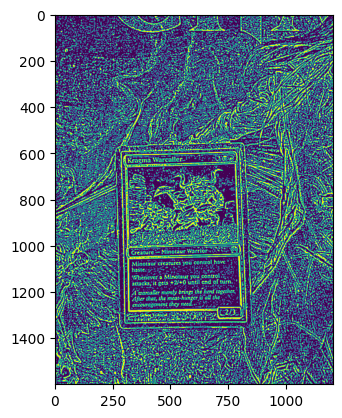

In [7]:
# Threshold and morph close
thresh = cv2.threshold(th3, 160, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()



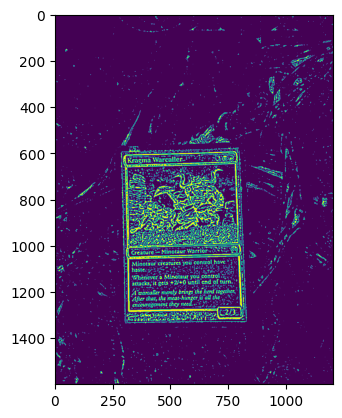

In [8]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = thresh.copy()
cv2.drawContours(clone, contours, -1, (0, 255, 0), 3)
plt.imshow(clone)
plt.show()

15153
1


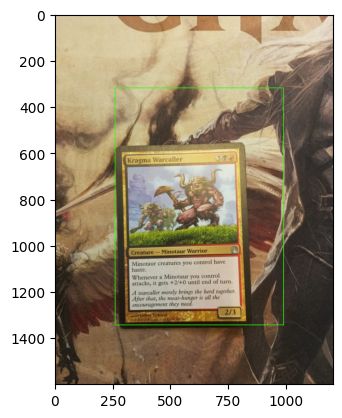

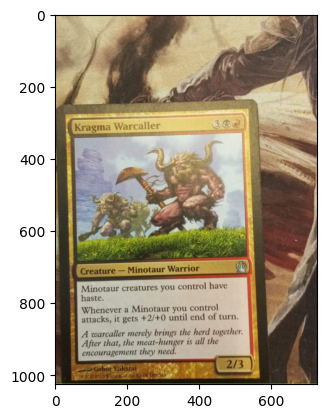

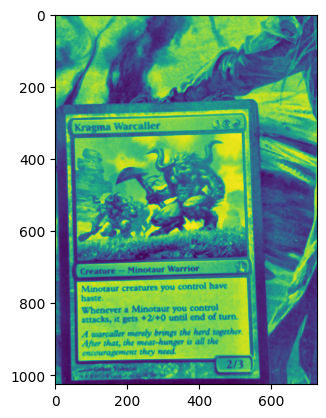

In [9]:
# Find contours and filter using threshold area
#cnts[0] if len(cnts) == 2 else cnts[1] -- not sure about this
cnts = contours 
imclone = image.copy()
imclonegray = img.copy()
min_area = 100000
max_area = 500000
image_number = 0
print(len(cnts))
ROI = img
ROIGRAY = img
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        #print("found")
        x,y,w,h = cv2.boundingRect(c)
        #assume y>200
        ROI = imclone[y:y+h, x:x+w]
        ROIGRAY = imclonegray[y:y+h, x:x+w]
        #cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(imclone, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1
print(str(image_number))
plt.imshow(imclone)
plt.show()
plt.imshow(ROI)
plt.show()
plt.imshow(ROIGRAY)
plt.show()

(1025, 727, 3)
1025
727
3
(64, 727, 3)


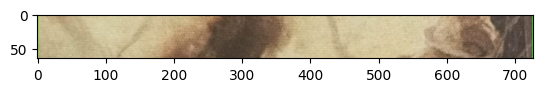

In [10]:
print(ROI.shape)
hight,width,colour = ROI.shape
print(hight)
print(width)
print(colour)

Header = ROI[0:int(hight /16),0:width]
print(Header.shape)
plt.imshow(Header)
plt.show()

In [11]:
cv2.imwrite('results/ROI.png', ROI)
cv2.imwrite('results/Header.png', Header)

True